# Mounts, installations and imports

In [1]:
# Mount workspace
from google.colab import drive
drive.mount('/content/drive')
!unzip -o -u "/content/drive/My Drive/ASU/Spring24/DataMining/DM-Project/product-review-sentiment-analysis.zip" -d "."

Mounted at /content/drive
Archive:  /content/drive/My Drive/ASU/Spring24/DataMining/DM-Project/product-review-sentiment-analysis.zip
   creating: ./visualization/
  inflating: ./visualization/visualization.py  
   creating: ./preprocessors/
  inflating: ./preprocessors/loaders.py  
  inflating: ./preprocessors/features.py  
 extracting: ./Makefile              
   creating: ./utils/
  inflating: ./utils/constants.py    
  inflating: ./utils/utils.py        
   creating: ./models/
   creating: ./models/LLM/
  inflating: ./models/LLM/BART.py    
  inflating: ./models/NN.py          
   creating: ./evaluators/
  inflating: ./evaluators/evaluators.py  
  inflating: ./preprocessing.py      
   creating: ./Data/
   creating: ./Data/raw_data/
   creating: ./Data/raw_data/Amazon/
  inflating: ./Data/raw_data/Amazon/test.csv  
  inflating: ./Data/raw_data/Amazon/train.csv  
   creating: ./Data/raw_data/Yelp/
  inflating: ./Data/raw_data/Yelp/test.csv  
  inflating: ./Data/raw_data/Yelp/train.cs

In [2]:
# installations
!pip install stormtrooper

  Preparing metadata (setup.py) ... done
  Created wheel for thefuzz: filename=thefuzz-0.18.0-py2.py3-none-any.whl size=18200 sha256=71e9cbb72f42c1d93ef0f37de93eaa474468632812130f06e2f9a44f32e5f360
  Stored in directory: /root/.cache/pip/wheels/8f/5b/ba/9b1a261ddd5216f10d8c6b14007d5db4b1aa16a4556d682031
Successfully built thefuzz


In [3]:
# Imports
# external imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# internal imports
from preprocessors import loaders
from utils import constants
from utils import utils
from visualization import visualization
from evaluators import evaluators
from models.LLM import BART

/usr/local/lib/python3.10/dist-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Amazon Dataset

## Load dataset

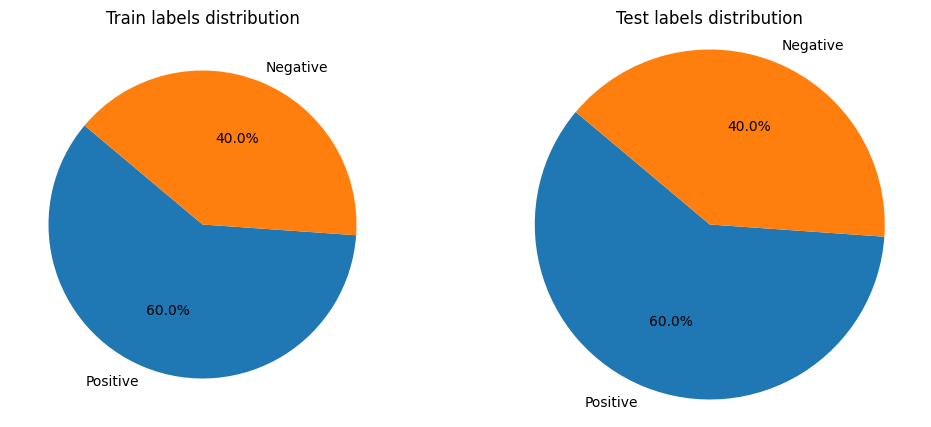

In [4]:
amazon_train_df, amazon_test_df = loaders.load_raw_data(constants.DatasetAmazon, root_path="/content/drive/My Drive/ASU/Spring24/DataMining/product-review-sentiment-analysis")
visualization.plot_label_distribution(amazon_train_df, amazon_test_df)

## Model Initialization

In [5]:
model = BART.BARTZeroShotClassifier(device="cuda")
model_name = "BART_ZeroShotClassifier"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Model Evaluation

In [6]:
dataset = constants.DatasetAmazon
max_rows = 50000
train_df, test_df = amazon_train_df[:max_rows], amazon_test_df[:max_rows]
run_id = "1"
batch_size = 1000
evaluators.batch_evaluate(model, model_name, train_df, test_df, batch_size, "/content/drive/My Drive/ASU/Spring24/DataMining/product-review-sentiment-analysis/Data/Output", dataset, run_id)


  1%|          | 10/1000 [00:01<01:25, 11.60it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.20it/s]


Time taken (in seconds) for predicting Train dataset: 41.030111


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.09it/s]


Time taken (in seconds) for predicting Test dataset: 41.682533
Completed batch#: 1, remaining: 49


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.47it/s]


Time taken (in seconds) for predicting Train dataset: 41.038406


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.53it/s]


Time taken (in seconds) for predicting Test dataset: 40.931607
Completed batch#: 2, remaining: 48


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.75it/s]


Time taken (in seconds) for predicting Train dataset: 40.567506


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.98it/s]


Time taken (in seconds) for predicting Test dataset: 40.204191
Completed batch#: 3, remaining: 47


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.80it/s]


Time taken (in seconds) for predicting Train dataset: 40.486427


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.43it/s]


Time taken (in seconds) for predicting Test dataset: 41.103945
Completed batch#: 4, remaining: 46


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.89it/s]


Time taken (in seconds) for predicting Train dataset: 40.353483


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.77it/s]


Time taken (in seconds) for predicting Test dataset: 40.545080
Completed batch#: 5, remaining: 45


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
 98%|█████████▊| 985/1000 [00:39<00:00, 24.71it/s]


Exception! object of type 'float' has no len()
Completed batch#: 6, remaining: 44


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.59it/s]


Time taken (in seconds) for predicting Train dataset: 40.841501


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.71it/s]


Time taken (in seconds) for predicting Test dataset: 40.628668
Completed batch#: 7, remaining: 43


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.89it/s]


Time taken (in seconds) for predicting Train dataset: 40.338635


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.31it/s]


Time taken (in seconds) for predicting Test dataset: 41.316117
Completed batch#: 8, remaining: 42


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.56it/s]


Time taken (in seconds) for predicting Train dataset: 40.894473


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.87it/s]


Time taken (in seconds) for predicting Test dataset: 40.385624
Completed batch#: 9, remaining: 41


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.60it/s]


Time taken (in seconds) for predicting Train dataset: 40.815302


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.52it/s]


Time taken (in seconds) for predicting Test dataset: 40.951656
Completed batch#: 10, remaining: 40


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
 85%|████████▌ | 851/1000 [00:34<00:06, 24.72it/s]


Exception! object of type 'float' has no len()
Completed batch#: 11, remaining: 39


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.65it/s]


Time taken (in seconds) for predicting Train dataset: 40.726053


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:39<00:00, 25.02it/s]


Time taken (in seconds) for predicting Test dataset: 40.135459
Completed batch#: 12, remaining: 38


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.42it/s]


Time taken (in seconds) for predicting Train dataset: 41.127840


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.56it/s]


Time taken (in seconds) for predicting Test dataset: 40.885449
Completed batch#: 13, remaining: 37


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.57it/s]


Time taken (in seconds) for predicting Train dataset: 40.862810


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.53it/s]


Time taken (in seconds) for predicting Test dataset: 40.937630
Completed batch#: 14, remaining: 36


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.86it/s]


Time taken (in seconds) for predicting Train dataset: 40.389244


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.47it/s]


Time taken (in seconds) for predicting Test dataset: 41.044074
Completed batch#: 15, remaining: 35


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.32it/s]


Time taken (in seconds) for predicting Train dataset: 41.283103


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.47it/s]


Time taken (in seconds) for predicting Test dataset: 41.047395
Completed batch#: 16, remaining: 34


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.61it/s]


Time taken (in seconds) for predicting Train dataset: 40.807761


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.72it/s]


Time taken (in seconds) for predicting Test dataset: 40.610026
Completed batch#: 17, remaining: 33


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.97it/s]


Time taken (in seconds) for predicting Train dataset: 40.220236


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.61it/s]


Time taken (in seconds) for predicting Test dataset: 40.808816
Completed batch#: 18, remaining: 32


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.71it/s]


Time taken (in seconds) for predicting Train dataset: 40.628056


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.98it/s]


Time taken (in seconds) for predicting Test dataset: 40.187586
Completed batch#: 19, remaining: 31


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.77it/s]


Time taken (in seconds) for predicting Train dataset: 40.532173


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.52it/s]


Time taken (in seconds) for predicting Test dataset: 40.965792
Completed batch#: 20, remaining: 30


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:39<00:00, 25.12it/s]


Time taken (in seconds) for predicting Train dataset: 39.973447


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.54it/s]


Time taken (in seconds) for predicting Test dataset: 40.905272
Completed batch#: 21, remaining: 29


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.85it/s]


Time taken (in seconds) for predicting Train dataset: 40.402635


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.75it/s]


Time taken (in seconds) for predicting Test dataset: 40.571031
Completed batch#: 22, remaining: 28


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
  0%|          | 1/1000 [00:00<00:40, 24.95it/s]


Exception! object of type 'float' has no len()
Completed batch#: 23, remaining: 27


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.74it/s]


Time taken (in seconds) for predicting Train dataset: 40.618499


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:42<00:00, 23.75it/s]


Time taken (in seconds) for predicting Test dataset: 42.276401
Completed batch#: 24, remaining: 26


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:42<00:00, 23.33it/s]


Time taken (in seconds) for predicting Train dataset: 43.052635


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.38it/s]


Time taken (in seconds) for predicting Test dataset: 41.189744
Completed batch#: 25, remaining: 25


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 23.90it/s]


Time taken (in seconds) for predicting Train dataset: 42.013370


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:42<00:00, 23.78it/s]


Time taken (in seconds) for predicting Test dataset: 42.247049
Completed batch#: 26, remaining: 24


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
 82%|████████▏ | 820/1000 [00:35<00:07, 23.19it/s]


Exception! object of type 'float' has no len()
Completed batch#: 27, remaining: 23


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 23.98it/s]


Time taken (in seconds) for predicting Train dataset: 41.884515


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.41it/s]


Time taken (in seconds) for predicting Test dataset: 41.131566
Completed batch#: 28, remaining: 22


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.54it/s]


Time taken (in seconds) for predicting Train dataset: 40.923953


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:42<00:00, 23.32it/s]


Time taken (in seconds) for predicting Test dataset: 43.067867
Completed batch#: 29, remaining: 21


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 23.85it/s]


Time taken (in seconds) for predicting Train dataset: 42.098531


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.24it/s]


Time taken (in seconds) for predicting Test dataset: 41.428812
Completed batch#: 30, remaining: 20


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:42<00:00, 23.37it/s]


Time taken (in seconds) for predicting Train dataset: 42.977048


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.22it/s]


Time taken (in seconds) for predicting Test dataset: 41.462638
Completed batch#: 31, remaining: 19


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.64it/s]


Time taken (in seconds) for predicting Train dataset: 40.753256


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.18it/s]


Time taken (in seconds) for predicting Test dataset: 41.518751
Completed batch#: 32, remaining: 18


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:42<00:00, 23.64it/s]


Time taken (in seconds) for predicting Train dataset: 42.488857


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 23.93it/s]


Time taken (in seconds) for predicting Test dataset: 41.964284
Completed batch#: 33, remaining: 17


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
 68%|██████▊   | 681/1000 [00:28<00:13, 24.18it/s]


Exception! object of type 'float' has no len()
Completed batch#: 34, remaining: 16


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 23.81it/s]


Time taken (in seconds) for predicting Train dataset: 42.172148


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.02it/s]


Time taken (in seconds) for predicting Test dataset: 41.802896
Completed batch#: 35, remaining: 15


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.46it/s]


Time taken (in seconds) for predicting Train dataset: 41.034244


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.77it/s]


Time taken (in seconds) for predicting Test dataset: 40.536599
Completed batch#: 36, remaining: 14


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.35it/s]


Time taken (in seconds) for predicting Train dataset: 41.237261


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.35it/s]


Time taken (in seconds) for predicting Test dataset: 41.232808
Completed batch#: 37, remaining: 13


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 23.98it/s]


Time taken (in seconds) for predicting Train dataset: 41.884991


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.61it/s]


Time taken (in seconds) for predicting Test dataset: 40.802618
Completed batch#: 38, remaining: 12


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.72it/s]


Time taken (in seconds) for predicting Train dataset: 40.600403


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.86it/s]


Time taken (in seconds) for predicting Test dataset: 40.383964
Completed batch#: 39, remaining: 11


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.69it/s]


Time taken (in seconds) for predicting Train dataset: 40.685854


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.61it/s]


Time taken (in seconds) for predicting Test dataset: 40.802280
Completed batch#: 40, remaining: 10


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.47it/s]


Time taken (in seconds) for predicting Train dataset: 41.037141


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:39<00:00, 25.02it/s]


Time taken (in seconds) for predicting Test dataset: 40.136566
Completed batch#: 41, remaining: 9


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:39<00:00, 25.18it/s]


Time taken (in seconds) for predicting Train dataset: 39.871649


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.60it/s]


Time taken (in seconds) for predicting Test dataset: 40.835292
Completed batch#: 42, remaining: 8


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.44it/s]


Time taken (in seconds) for predicting Train dataset: 41.073820


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.46it/s]


Time taken (in seconds) for predicting Test dataset: 41.060540
Completed batch#: 43, remaining: 7


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:42<00:00, 23.49it/s]


Time taken (in seconds) for predicting Train dataset: 42.758074


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:42<00:00, 23.27it/s]


Time taken (in seconds) for predicting Test dataset: 43.157828
Completed batch#: 44, remaining: 6


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:43<00:00, 23.10it/s]


Time taken (in seconds) for predicting Train dataset: 43.485589


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.04it/s]


Time taken (in seconds) for predicting Test dataset: 41.776909
Completed batch#: 45, remaining: 5


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.04it/s]


Time taken (in seconds) for predicting Train dataset: 41.763810


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 23.83it/s]


Time taken (in seconds) for predicting Test dataset: 42.133352
Completed batch#: 46, remaining: 4


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 23.93it/s]


Time taken (in seconds) for predicting Train dataset: 41.966027


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.24it/s]


Time taken (in seconds) for predicting Test dataset: 41.434195
Completed batch#: 47, remaining: 3


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 23.94it/s]


Time taken (in seconds) for predicting Train dataset: 41.943332


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:40<00:00, 24.62it/s]


Time taken (in seconds) for predicting Test dataset: 40.792281
Completed batch#: 48, remaining: 2


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
 53%|█████▎    | 527/1000 [00:21<00:19, 24.76it/s]


Exception! object of type 'float' has no len()
Completed batch#: 49, remaining: 1


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 23.83it/s]


Time taken (in seconds) for predicting Train dataset: 42.142415


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:41<00:00, 24.36it/s]

Time taken (in seconds) for predicting Test dataset: 41.210769
Completed batch#: 50, remaining: 0


# Yelp Dataset

## Load Dataset

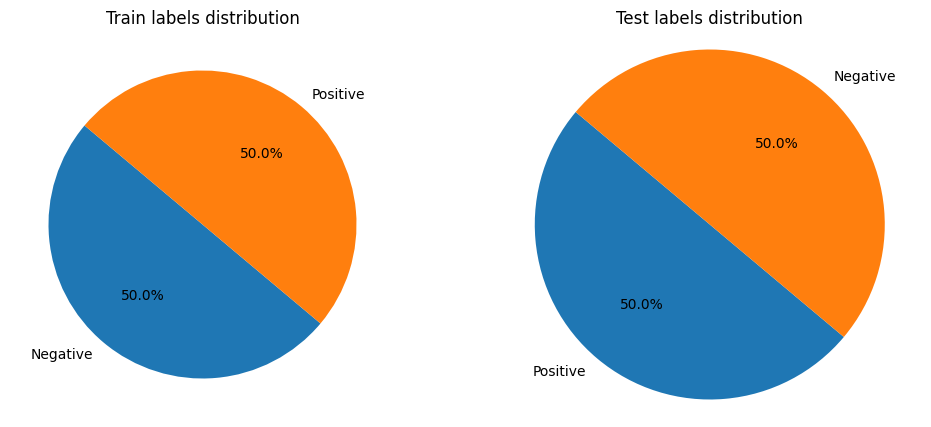

In [7]:
yelp_train_df, yelp_test_df = loaders.load_raw_data(constants.DatasetYelp, root_path="/content/drive/My Drive/ASU/Spring24/DataMining/product-review-sentiment-analysis")
visualization.plot_label_distribution(yelp_train_df, yelp_test_df)

## Model Evaluation

In [8]:
dataset = constants.DatasetYelp
max_rows = 50000
batch_size = 1000
train_df, test_df = yelp_train_df[:max_rows], yelp_test_df[:max_rows]
run_id = "2"
evaluators.batch_evaluate(model, model_name, train_df, test_df, batch_size, "/content/drive/My Drive/ASU/Spring24/DataMining/product-review-sentiment-analysis/Data/Output", dataset, run_id)


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.40it/s]


Time taken (in seconds) for predicting Train dataset: 49.330235


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 20.92it/s]


Time taken (in seconds) for predicting Test dataset: 47.999133
Completed batch#: 1, remaining: 49


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.59it/s]


Time taken (in seconds) for predicting Train dataset: 48.789564


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.36it/s]


Time taken (in seconds) for predicting Test dataset: 49.343326
Completed batch#: 2, remaining: 48


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:52<00:00, 19.02it/s]


Time taken (in seconds) for predicting Train dataset: 52.818372


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.61it/s]


Time taken (in seconds) for predicting Test dataset: 48.748491
Completed batch#: 3, remaining: 47


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:51<00:00, 19.51it/s]


Time taken (in seconds) for predicting Train dataset: 51.495825


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.61it/s]


Time taken (in seconds) for predicting Test dataset: 48.720652
Completed batch#: 4, remaining: 46


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.51it/s]


Time taken (in seconds) for predicting Train dataset: 48.962447


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.21it/s]


Time taken (in seconds) for predicting Test dataset: 49.702593
Completed batch#: 5, remaining: 45


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.38it/s]


Time taken (in seconds) for predicting Train dataset: 49.292935


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 20.92it/s]


Time taken (in seconds) for predicting Test dataset: 47.991816
Completed batch#: 6, remaining: 44


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 20.97it/s]


Time taken (in seconds) for predicting Train dataset: 47.871879


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.79it/s]


Time taken (in seconds) for predicting Test dataset: 48.275750
Completed batch#: 7, remaining: 43


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.83it/s]


Time taken (in seconds) for predicting Train dataset: 48.211717


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:50<00:00, 19.76it/s]


Time taken (in seconds) for predicting Test dataset: 50.818419
Completed batch#: 8, remaining: 42


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:46<00:00, 21.31it/s]


Time taken (in seconds) for predicting Train dataset: 47.118493


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.38it/s]


Time taken (in seconds) for predicting Test dataset: 49.281602
Completed batch#: 9, remaining: 41


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:46<00:00, 21.39it/s]


Time taken (in seconds) for predicting Train dataset: 46.941987


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:51<00:00, 19.25it/s]


Time taken (in seconds) for predicting Test dataset: 52.155221
Completed batch#: 10, remaining: 40


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:45<00:00, 22.12it/s]


Time taken (in seconds) for predicting Train dataset: 45.380632


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:51<00:00, 19.41it/s]


Time taken (in seconds) for predicting Test dataset: 51.711065
Completed batch#: 11, remaining: 39


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.79it/s]


Time taken (in seconds) for predicting Train dataset: 48.299192


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.39it/s]


Time taken (in seconds) for predicting Test dataset: 49.260979
Completed batch#: 12, remaining: 38


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.70it/s]


Time taken (in seconds) for predicting Train dataset: 48.518072


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.78it/s]


Time taken (in seconds) for predicting Test dataset: 48.329293
Completed batch#: 13, remaining: 37


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.02it/s]


Time taken (in seconds) for predicting Train dataset: 47.772810


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.83it/s]


Time taken (in seconds) for predicting Test dataset: 48.208299
Completed batch#: 14, remaining: 36


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 20.92it/s]


Time taken (in seconds) for predicting Train dataset: 48.014592


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.65it/s]


Time taken (in seconds) for predicting Test dataset: 48.628152
Completed batch#: 15, remaining: 35


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:50<00:00, 19.65it/s]


Time taken (in seconds) for predicting Train dataset: 51.133383


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.61it/s]


Time taken (in seconds) for predicting Test dataset: 48.730846
Completed batch#: 16, remaining: 34


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.68it/s]


Time taken (in seconds) for predicting Train dataset: 48.553669


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.57it/s]


Time taken (in seconds) for predicting Test dataset: 48.810221
Completed batch#: 17, remaining: 33


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.39it/s]


Time taken (in seconds) for predicting Train dataset: 49.241810


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.55it/s]


Time taken (in seconds) for predicting Test dataset: 48.860685
Completed batch#: 18, remaining: 32


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.11it/s]


Time taken (in seconds) for predicting Train dataset: 49.948726


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.20it/s]


Time taken (in seconds) for predicting Test dataset: 47.363846
Completed batch#: 19, remaining: 31


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.13it/s]


Time taken (in seconds) for predicting Train dataset: 47.529675


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.14it/s]


Time taken (in seconds) for predicting Test dataset: 47.481924
Completed batch#: 20, remaining: 30


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.13it/s]


Time taken (in seconds) for predicting Train dataset: 47.519288


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:46<00:00, 21.44it/s]


Time taken (in seconds) for predicting Test dataset: 46.838699
Completed batch#: 21, remaining: 29


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.27it/s]


Time taken (in seconds) for predicting Train dataset: 47.211951


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.35it/s]


Time taken (in seconds) for predicting Test dataset: 49.323501
Completed batch#: 22, remaining: 28


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.13it/s]


Time taken (in seconds) for predicting Train dataset: 47.534795


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.57it/s]


Time taken (in seconds) for predicting Test dataset: 48.807118
Completed batch#: 23, remaining: 27


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:44<00:00, 22.39it/s]


Time taken (in seconds) for predicting Train dataset: 44.829355


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:45<00:00, 21.81it/s]


Time taken (in seconds) for predicting Test dataset: 46.050414
Completed batch#: 24, remaining: 26


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:46<00:00, 21.57it/s]


Time taken (in seconds) for predicting Train dataset: 46.540571


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.27it/s]


Time taken (in seconds) for predicting Test dataset: 49.533459
Completed batch#: 25, remaining: 25


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.22it/s]


Time taken (in seconds) for predicting Train dataset: 47.325287


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.09it/s]


Time taken (in seconds) for predicting Test dataset: 47.612025
Completed batch#: 26, remaining: 24


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 20.92it/s]


Time taken (in seconds) for predicting Train dataset: 47.977946


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.29it/s]


Time taken (in seconds) for predicting Test dataset: 49.464075
Completed batch#: 27, remaining: 23


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.19it/s]


Time taken (in seconds) for predicting Train dataset: 47.392454


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 20.97it/s]


Time taken (in seconds) for predicting Test dataset: 47.875687
Completed batch#: 28, remaining: 22


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:46<00:00, 21.36it/s]


Time taken (in seconds) for predicting Train dataset: 47.008138


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.02it/s]


Time taken (in seconds) for predicting Test dataset: 50.176979
Completed batch#: 29, remaining: 21


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.00it/s]


Time taken (in seconds) for predicting Train dataset: 47.810177


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.44it/s]


Time taken (in seconds) for predicting Test dataset: 49.117632
Completed batch#: 30, remaining: 20


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 20.95it/s]


Time taken (in seconds) for predicting Train dataset: 47.934703


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.69it/s]


Time taken (in seconds) for predicting Test dataset: 48.546697
Completed batch#: 31, remaining: 19


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.27it/s]


Time taken (in seconds) for predicting Train dataset: 47.216634


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.65it/s]


Time taken (in seconds) for predicting Test dataset: 48.617827
Completed batch#: 32, remaining: 18


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.05it/s]


Time taken (in seconds) for predicting Train dataset: 47.692937


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.49it/s]


Time taken (in seconds) for predicting Test dataset: 49.020227
Completed batch#: 33, remaining: 17


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.24it/s]


Time taken (in seconds) for predicting Train dataset: 49.612109


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.36it/s]


Time taken (in seconds) for predicting Test dataset: 49.308887
Completed batch#: 34, remaining: 16


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:46<00:00, 21.28it/s]


Time taken (in seconds) for predicting Train dataset: 47.183744


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.54it/s]


Time taken (in seconds) for predicting Test dataset: 48.892553
Completed batch#: 35, remaining: 15


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:45<00:00, 21.80it/s]


Time taken (in seconds) for predicting Train dataset: 46.059882


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:46<00:00, 21.44it/s]


Time taken (in seconds) for predicting Test dataset: 46.826712
Completed batch#: 36, remaining: 14


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.21it/s]


Time taken (in seconds) for predicting Train dataset: 47.336225


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 20.85it/s]


Time taken (in seconds) for predicting Test dataset: 48.146374
Completed batch#: 37, remaining: 13


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.02it/s]


Time taken (in seconds) for predicting Train dataset: 47.770314


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:48<00:00, 20.63it/s]


Time taken (in seconds) for predicting Test dataset: 48.657897
Completed batch#: 38, remaining: 12


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:46<00:00, 21.39it/s]


Time taken (in seconds) for predicting Train dataset: 46.949481
Completed batch#: 39, remaining: 11


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.12it/s]


Time taken (in seconds) for predicting Train dataset: 47.541155
Completed batch#: 40, remaining: 10


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.10it/s]


Time taken (in seconds) for predicting Train dataset: 47.579222
Completed batch#: 41, remaining: 9


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:45<00:00, 21.76it/s]


Time taken (in seconds) for predicting Train dataset: 46.134480
Completed batch#: 42, remaining: 8


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:46<00:00, 21.66it/s]


Time taken (in seconds) for predicting Train dataset: 46.358246
Completed batch#: 43, remaining: 7


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.38it/s]


Time taken (in seconds) for predicting Train dataset: 49.243944
Completed batch#: 44, remaining: 6


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:45<00:00, 21.97it/s]


Time taken (in seconds) for predicting Train dataset: 45.714853
Completed batch#: 45, remaining: 5


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:45<00:00, 21.84it/s]


Time taken (in seconds) for predicting Train dataset: 45.970313
Completed batch#: 46, remaining: 4


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.26it/s]


Time taken (in seconds) for predicting Train dataset: 47.220806
Completed batch#: 47, remaining: 3


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:46<00:00, 21.65it/s]


Time taken (in seconds) for predicting Train dataset: 46.361400
Completed batch#: 48, remaining: 2


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:47<00:00, 21.25it/s]


Time taken (in seconds) for predicting Train dataset: 47.251203
Completed batch#: 49, remaining: 1


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1000/1000 [00:49<00:00, 20.07it/s]

Time taken (in seconds) for predicting Train dataset: 50.022744
Completed batch#: 50, remaining: 0
